In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os , shutil

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [4]:
!unzip 'drive/My Drive/Copy of covid_data.zip'

Archive:  drive/My Drive/Copy of covid_data.zip
  inflating: val/corona/1.jpeg       
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: val/corona/ryct.2020200034.fig5-day7.jpeg  
  inflating: val/normal/IM-0154-0001.jpeg  
  inflating: val/normal/IM-0141-0001.jpeg  
  inflating: val/normal/IM-0140-0001.jpeg  
  inflating: val/normal/IM-0156-0001.jpeg  
  inflating: val/normal/IM-0149-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: val/normal/IM-0151-0001.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg  
  inflating: val/normal/IM-0147-0001.jpeg  
  inflating: val/normal/IM-0145-0001.jpeg  
  inflating: test/normal/IM-0115-0001.jpeg  
  inflating: val/normal/IM-0152-0001.jpeg  
  inflating: test/corona/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg  
  inflating: val/corona/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg  
  inflating: test/coro

In [40]:
source = 'drive/My Drive/Copy of covid_data.zip'
print(os.path.exists(source))

False


In [41]:
source = "D:\covid"
print(os.path.exists(source))

True


In [42]:
print(os.listdir(source))

['test', 'train', 'val']


Prepare the Data

In [43]:
train = os.path.join(source,'train')
train

'D:\\covid\\train'

In [48]:
val = os.path.join(source,'val')
test = os.path.join(source,'test')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_directory(
train,
target_size=(200, 200),
batch_size=20,
class_mode='binary')            

Found 5402 images belonging to 2 classes.


In [60]:
validation_generator = test_datagen.flow_from_directory(
val,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 26 images belonging to 2 classes.


In [61]:
counter =0
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
4
4


In [62]:
data_batch[0]
labels_batch[0]

1.0

Making a Model 

In [63]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu' , input_shape = (200,200,3)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 45, 45, 128)      

Compile Model 

In [68]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4) ,
              loss="binary_crossentropy" , 
              metrics= ['acc'])

In [69]:
histore = model.fit(train_gen,steps_per_epoch=20,epochs=10, validation_data=val_gen, validation_steps=30)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 30 steps
Epoch 1/10
20/20 [==============================] - 97s 5s/step - loss: 0.1875 - acc: 0.9625 - val_loss: 0.1092 - val_acc: 0.7308


Prepare test Data

In [ ]:
test_gen = gen.flow_from_directory(test , target_size=(200,200) , class_mode='binary' , batch_size= 20)

In [49]:
counter =0
for data_b, labels_b in test_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
4
4


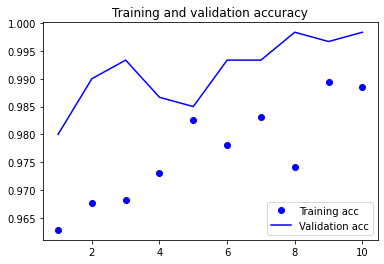

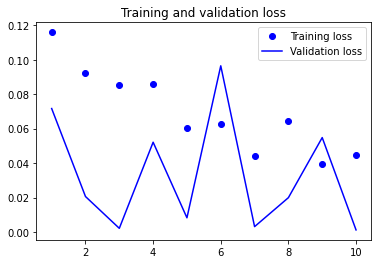

In [50]:
%matplotlib inline  
import matplotlib.pyplot as plt
history = histore.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test a single Image of Corona and non corona x-ray 

In [0]:
d = 'test/normal/IM-0131-0001.jpeg' # non corona image
f = "test/corona/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg"  # corona image

In [0]:
t = image.load_img(d ,target_size=(200,200))
t= image.img_to_array(t)
t = np.expand_dims(t , axis=0)
t/= 255.

tf = image.load_img(f ,target_size=(200,200))
tf= image.img_to_array(tf)
tf = np.expand_dims(tf , axis=0)
tf/= 255.

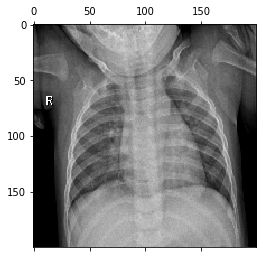

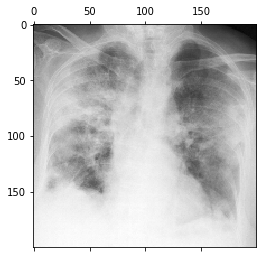

In [53]:
plt.matshow(t[0]) # non corona image
plt.matshow(tf[0]) # corona image

In [0]:
b = model.predict(t[[0]])
a = model.predict(tf[[0]])

In [55]:
if a<.50:
  print("corona")


corona


In [56]:
if b>.50 :
  print('good health')

good health


Making a list as per prediction on test data

In [0]:
# TEST the MOdel
predict = model.predict(test_gen)
predict = list(predict)

In [0]:
prediction =[]


In [0]:
for i in predict:
  if i>.50:
    prediction.append("Healthy")
  else:
    prediction.append('CORONA VIRUS')

In [60]:
prediction,predict

(['Healthy',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy',
  'Healthy'],
 [array([0.99999964], dtype=float32),
  array([0.99999094], dtype=float32),
  array([0.00310535], dtype=float32),
  array([0.03566553], dtype=float32),
  array([0.00053127], dtype=float32),
  array([0.00024431], dtype=float32),
  array([0.00079519], dtype=float32),
  array([0.00064908], dtype=float32),
  array([0.9997609], dtype=float32),
  array([0.00175281], dtype=float32),
  array([0.00473713], dtype=float32),
  array([0.99999833], dtype=float32),
  array([0.9999964], dtype=float32),
  array([3.0824533e-05], dtype=float32),
  array([0.0006317], dtype=float32),
  array([1.], dtype=float32),
  array([0.999841], dtype=float32),
  array([0.9999994], dtype=float32),
  array([0.99999

In [0]:
model.save('Covide19 .h5')